In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import glob

In [2]:
splits = ["site", "rand"] #["rand", "day", "site"]
metrics = ["valid_r2", "valid_rmse"] # "valid_mae"

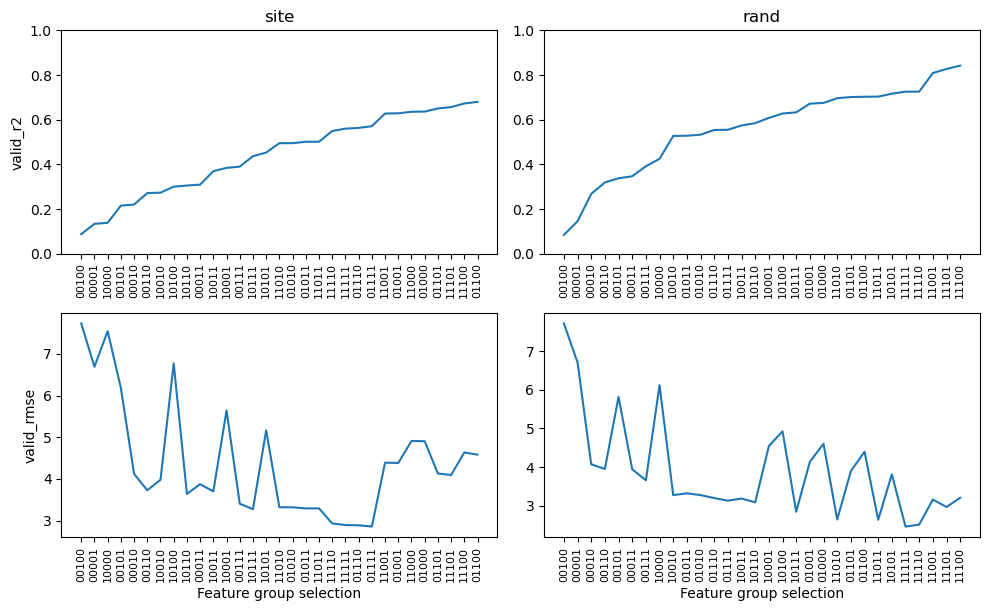

In [3]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10 / 1.61))#, sharex = "col", sharey = "row")

for w, split in enumerate(splits):
    if split == "rand":
        fns = glob.glob(f"../results/dead/group_importance_rand/trial_results.csv")
    else:
        fns = glob.glob(f"../results/dead/group_importance/trial_results.csv")
    f = pd.read_csv(fns[0])
    f = f[f.notna()]
    f["key"] = str(f["use_static"]) + str(f["use_hrrr"]) + str(f["use_nwm"]) + str(f["use_sat"]) + str(f["use_lst"])
    for metric, axes in zip(metrics, axs):
        ax = axes[w]
        results = defaultdict(list)
        for k, row in f.iterrows():
            key = str(row["use_static"]) + str(row["use_hrrr"]) + str(row["use_nwm"]) + str(row["use_sat"]) + str(row["use_lst"])
            results[key].append(row[metric])

        if metric == "valid_r2":
            flat = {k: np.mean(v) for k, v in results.items()}
            flat = {k: v for k, v in sorted(flat.items(), key=lambda x: x[1])}
            flat_std = {k: np.std(v) for k, v in results.items()}
            flat_std = {k: flat_std[k] for k, v in flat.items()}
            order = flat.keys()
            ax.set_ylim([0, 1])
        else:
            flat = {k: np.mean(v) for k, v in results.items()}
            flat = {k: flat[k] for k in order}
            flat_std = {k: np.std(v) for k, v in results.items()}
            flat_std = {k: flat_std[k] for k, v in flat.items()}
            order = flat.keys()
        
        ax.errorbar(range(len(flat)), flat.values(), yerr = flat_std.values())
        ax.set_xticks(range(len(flat)))
        ax.set_xticklabels(list(flat.keys()), rotation=90, fontsize = 8)
        
        if w == 0:
            ax.set_ylabel(metric)

        if metric == "valid_rmse":
            ax.set_xlabel("Feature group selection")
            
        elif metric == "valid_r2":
            ax.set_title(split)
        
plt.tight_layout()

[static, hrrr, nwm, satellite, LST]

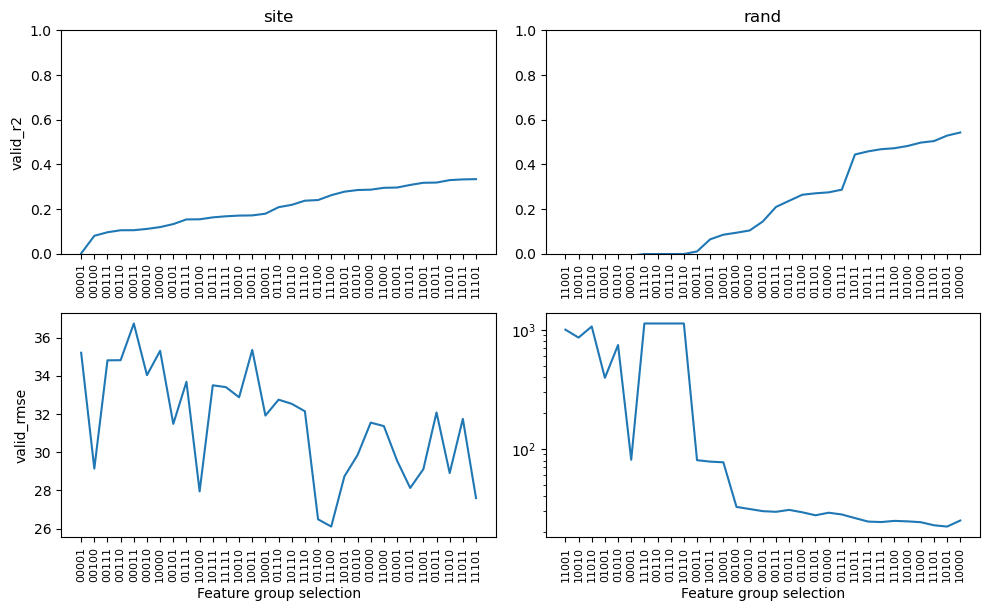

In [4]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10 / 1.61))#, sharex = "col", sharey = "row")

for w, split in enumerate(splits):
    if split == "rand":
        fns = glob.glob(f"../results/live/group_importance_rand/trial_results/*csv")
    else:
        fns = glob.glob(f"../results/live/group_importance/trial_results/*.csv")
    f = pd.read_csv(fns[0])
    f = f[f.notna()]
    f["key"] = str(f["use_static"]) + str(f["use_hrrr"]) + str(f["use_nwm"]) + str(f["use_sat"]) + str(f["use_lst"])
    for metric, axes in zip(metrics, axs):
        ax = axes[w]
        results = defaultdict(list)
        for k, row in f.iterrows():
            key = str(row["use_static"]) + str(row["use_hrrr"]) + str(row["use_nwm"]) + str(row["use_sat"]) + str(row["use_lst"])
            results[key].append(row[metric])

        if metric == "valid_r2":
            flat = {k: np.mean(v) for k, v in results.items()}
            flat = {k: v for k, v in sorted(flat.items(), key=lambda x: x[1])}
            flat_std = {k: np.std(v) for k, v in results.items()}
            flat_std = {k: flat_std[k] for k, v in flat.items()}
            order = flat.keys()
            ax.set_ylim([0, 1])
        else:
            flat = {k: np.mean(v) for k, v in results.items()}
            flat = {k: flat[k] for k in order}
            flat_std = {k: np.std(v) for k, v in results.items()}
            flat_std = {k: flat_std[k] for k, v in flat.items()}
            order = flat.keys()
        
        ax.errorbar(range(len(flat)), flat.values(), yerr = flat_std.values())
        ax.set_xticks(range(len(flat)))
        ax.set_xticklabels(list(flat.keys()), rotation=90, fontsize = 8)
        
        if w == 0:
            ax.set_ylabel(metric)

        if metric == "valid_rmse":
            ax.set_xlabel("Feature group selection")
            
            if split == "rand":
                ax.set_yscale("log")
            
        elif metric == "valid_r2":
            ax.set_title(split)
        
plt.tight_layout()

In [ ]:
### With day data, not using satellite gives the higher RMSE
### With site data, not using satellite gives poor R2 and higher RMSE
### With random data, same story. With sat var and no nwm, slightly higher RMSE.